<a href="https://colab.research.google.com/github/Zyuuu-G/Optics/blob/main/ABCD_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABCD Calculation

In [ ]:
from sympy import *
import numpy as np


d, f, R, n1, n2 = symbols('d f R n1 n2',real=True)

# define the basic abcd matrices for the different types of optics

# propagation matrix, propagate a distance 'd'
prop=Matrix([[1,d],[0,1]])

# thin lens of focal length 'f'
lens=Matrix([[1,0],[-1/f,1]])

# spherical mirror with radius of curvature 'R'
mirror=Matrix([[1,0],[2/R,1]])

# plane surface interface going from n1 -> n2
surface=Matrix([[1,0],[0,n1/n2]])

# spherical surface interface going from n1 -> n2
sph_surface=Matrix([[1,0],[-(n2-n1)/(n2*R),n1/n2]])

# plane mirror
plane_mirror = Matrix([[1,0],[0,1]])

In [ ]:
y1i, y1f, theta1i, theta1f = symbols('y_1i y_1f theta_1i theta_1f',real=True) #beam1
y2i, y2f, theta2i, theta2f = symbols('y_2i y_2f theta_2i theta_2f',real=True) #beam2

beam1i = Matrix([[y1i],[theta1i]])
beam1f = Matrix([[y1f],[theta1f]])
display(beam1i,'',beam1f)

Matrix([
[    y_1i],
[theta_1i]])

''

Matrix([
[    y_1f],
[theta_1f]])

In [ ]:
d1, d2 = symbols('d_1 d_2')
abcd = prop.subs(d,d2)*mirror*prop.subs(d,d1)

beam1f = abcd*beam1i
display(beam1f)

Matrix([
[theta_1i*(d_1*(1 + 2*d_2/R) + d_2) + y_1i*(1 + 2*d_2/R)],
[                      theta_1i*(1 + 2*d_1/R) + 2*y_1i/R]])

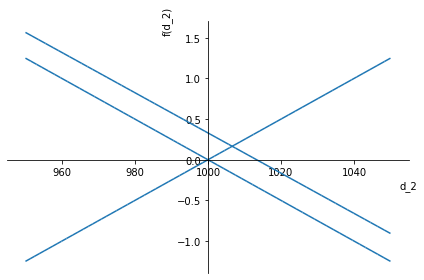

In [ ]:
plot(beam1f[0].subs([(R,-2000),(d1,200),(y1i,25),(theta1i,0)]),                 #beam1f
     beam1f[0].subs([(R,-2000),(d1,200),(y1i,-25),(theta1i,0)]),                #beam2f since the only difference bw 1&2 initial is "y initial"
     beam1f[0].subs([(R,-2000),(d1,200),(y1i,25),(theta1i,.00033)]),            #beam1f with error
     (d2,950,1050))

In [ ]:
eq = beam1f[0].subs([(R,-2000),(d1,200),(y1i,25),(theta1i,0)])-beam1f[0].subs([(R,-2000),(d1,200),(y1i,-25),(theta1i,0)])
display(eq)
sol1 = solve(eq,d2)
display(sol1)

50 - d_2/20

[1000]

In [ ]:
eq = beam1f[0].subs([(R,-2000),(d1,200),(y1i,25),(theta1i,0.000333)])-beam1f[0].subs([(R,-2000),(d1,200),(y1i,-25),(theta1i,0)])
display(eq)
sol1 = solve(eq,d2)
display(sol1)

50.0666 - 0.0497336*d_2

[1006.69567455402]

for hw 1 problem3

In [ ]:
ABCD = sph_surface*prop*sph_surface     #using pre difined matrixs
display(ABCD,' ',' ')

n_air = 1
n_water = 1.33
n_glass = 1.5
ABCD_air = sph_surface.subs([(n1,n_air),(n2,n_glass)])*prop*sph_surface.subs([(n1,n_air),(n2,n_glass)])

ABCD_water = sph_surface.subs([(n1,n_water),(n2,n_glass)])*prop*sph_surface.subs([(n1,n_water),(n2,n_glass)])

display(ABCD_air)
display('','',ABCD_water)

#Eq = ABCD_air.subs(R,250)        #maybe look for a relationship between R and d?
#Sol = solve(Eq,d)
#display('','',Sol)

Matrix([
[                                          1 + d*(n1 - n2)/(R*n2),                            d*n1/n2],
[(n1 - n2)*(n1/n2 + d*(n1 - n2)/(R*n2))/(R*n2) + (n1 - n2)/(R*n2), n1*(n1/n2 + d*(n1 - n2)/(R*n2))/n2]])

' '

' '

Matrix([
[                                                             1 - 0.333333333333333*d/R,                       0.666666666666667*d],
[-0.333333333333333*(0.666666666666667 - 0.333333333333333*d/R)/R - 0.333333333333333/R, 0.444444444444444 - 0.222222222222222*d/R]])

''

''

Matrix([
[                                                             1 - 0.113333333333333*d/R,                       0.886666666666667*d],
[-0.113333333333333*(0.886666666666667 - 0.113333333333333*d/R)/R - 0.113333333333333/R, 0.786177777777778 - 0.100488888888889*d/R]])

For hw 2 Peoblem 5

In [ ]:
d_lens = 3.5
R_lens = 51.5
right = surface.subs([(n1,n_glass),(n2,n_air)])*prop.subs(d,d_lens)*sph_surface.subs([(n1,n_air),(n2,n_glass),(R,R_lens)])
left = sph_surface.subs([(n1,n_glass),(n2,n_air),(R,-R_lens)])*prop.subs(d,d_lens)*surface.subs([(n1,n_air),(n2,n_glass)])
display("left",left)
display("right",right)


'left'

Matrix([
[                   1,  2.33333333333333],
[-0.00970873786407767, 0.977346278317152]])

'right'

Matrix([
[   0.977346278317152, 2.33333333333333],
[-0.00970873786407767,              1.0]])

Matrix([
[1 - 0.00970873786407767*d_2],
[       -0.00970873786407767]])

[103.000000000000]

Matrix([
[0.5*d_1*(1 - 0.00970873786407767*d_2) + 0.478964401294498*d_2 + 2.16666666666667],
[                                     0.478964401294498 - 0.00485436893203883*d_1]])

[103.0*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)]

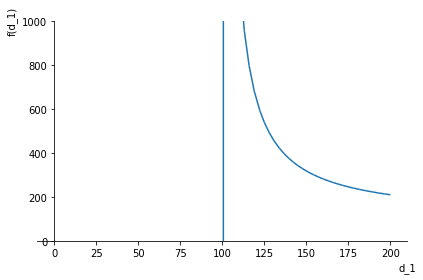

'mag'

1 - 1.0*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)

0.5*d_1*(1 - 1.0*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)) + 2.16666666666667 + 49.3333333333333*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)

Matrix([
[1 - 0.00970873786407767*d_2, d_1*(1 - 0.00970873786407767*d_2) + 0.977346278317152*d_2 + 2.33333333333333],
[       -0.00970873786407767,                                  0.977346278317152 - 0.00970873786407767*d_1]])

b0


[103.0*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)]

MAG


1 - 1.0*(3.0*d_1 + 7.0)/(3.0*d_1 - 302.0)

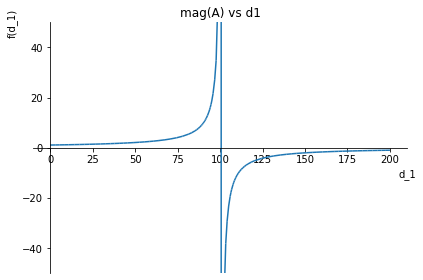

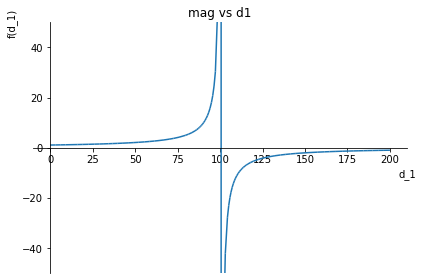

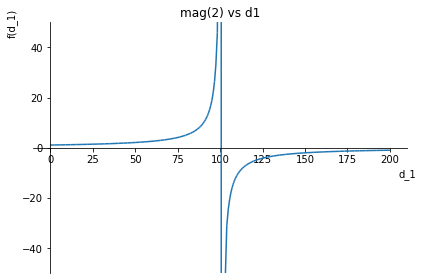

In [ ]:
beamf = prop.subs(d,d2)*left*prop.subs(d,d1)*beam1i.subs([(y1i,1),(theta1i,0)]) # parallel initial beam come in
display(beamf)
foc5 = solve(beamf[0],d2)    # get focal length at y = 0
display(foc5)


# magnification
beamf_2 = prop.subs(d,d2)*left*prop.subs(d,d1)*beam1i.subs([(y1i,1),(theta1i,0.5)]) # same spot(y=1,d=d1), diff angle, where they cross is the image and the height magnitude of yf/yi is mag
display(beamf_2)
dis5 = solve(beamf[0]-beamf_2[0],d2)  # distance at focus
display(dis5)
plot(dis5[0],(d1,0,200),ylim=(0,1000))

mag5 = beamf[0].subs(d2,dis5[0])    # plug back into first beam get y
mag52 = beamf_2[0].subs(d2,dis5[0]) # plug back into second beam
display('mag',mag5,mag52)


abcd5 = prop.subs(d,d2)*left*prop.subs(d,d1)
display(abcd5)
b0 = solve(abcd5[0,1],d2) # d2 needed to make B zero
mag5A = abcd5[0,0].subs(d2,b0[0])
print('b0')
display(b0)
print('MAG')
display(mag5A)

plot(mag5A,(d1,0,200),ylim=(-50,50),title='mag(A) vs d1') # calculated using A
plot(mag5,(d1,0,200),ylim=(-50,50),title='mag vs d1')     # calculated using first beam(parallel)
plot(mag52,(d1,0,200),ylim=(-50,50),title='mag(2) vs d1')  # second beam
### the last one doesn't agree with the first two, who's correct ?

In [ ]:
display(mag5.subs(d1,200))
display(mag52.subs(d1,200))
display(mag5A.subs(d1,200))

-1.03691275167785

-1.03691275167783

-1.03691275167785

In [ ]:
beamf = prop.subs(d,d2)*right*prop.subs(d,d1)##*beam1i.subs([(y1i,1),(theta1i,0)])
display(beamf)
ans = solve(beamf[0,1],d2)
an = prop.subs(d,-103)*left*prop.subs(d,d1)
display(ans,an)
print(ans[0].subs(d1,150))

print(beamf[0,0].subs(d2,ans[0].subs(d1,150)))

Matrix([
[0.977346278317152 - 0.00970873786407767*d_2, d_1*(0.977346278317152 - 0.00970873786407767*d_2) + 1.0*d_2 + 2.33333333333333],
[                       -0.00970873786407767,                                                  1.0 - 0.00970873786407767*d_1]])

[0.333333333333333*(302.0*d_1 + 721.0)/(d_1 - 103.0)]

Matrix([
[                 2.0,                  2.0*d_1 - 98.3333333333333],
[-0.00970873786407767, 0.977346278317152 - 0.00970873786407767*d_1]])

326.390070921986
-2.19148936170213


For hw 2 problem 7

Matrix([
[    147*d1/100 - d2*(51 - 49*d1/100)/25 - 349,   -49*d1/10 - d2*(51 - 49*d1/100)/5 - 470],
[3*d1/20000 - d2*(1/200 - d1/20000)/25 - 7/200, -d1/2000 - d2*(1/200 - d1/20000)/5 - 1/20]])

50*(49*d1 + 4700)/(49*d1 - 5100)

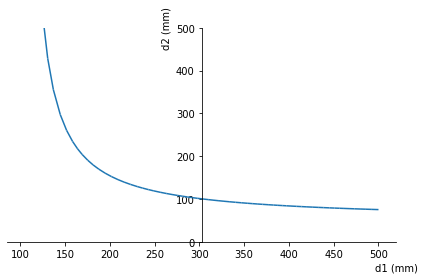

In [ ]:
f1 = 200
f2 = -100
f3 = 25
d0 = 10000
d1, d2 = symbols('d1,d2', real=true)
d3 = 30
ABCD_7 = prop.subs(d,d0)*lens.subs(f,f1)*prop.subs(d,d1)*lens.subs(f,f2)*prop.subs(d,d2)*lens.subs(f,f3)*prop.subs(d,d3)
display(ABCD_7)

d1d2 = solve(ABCD_7[0,1],d2)
display(d1d2[0])
p7 = plot(d1d2[0],(d1,105,500),show=False)
p7.xlabel = 'd1 (mm)'
p7.ylabel = 'd2 (mm)'
p7.ylim = (0,500)
p7.show()

hw 2 problem 2.16


In [ ]:
# d is always positive
ABCD_216 = mirror*prop.subs(d,-d)*plane_mirror*prop
display(ABCD_216)

Matrix([
[  1, 0],
[2/R, 1]])

Matrix([
[   -1,  0],
[-2/d1, -1]])

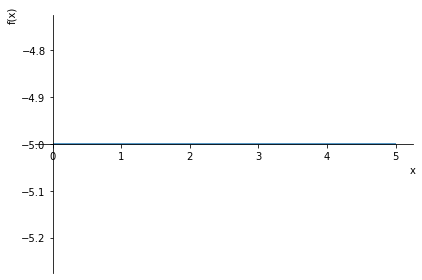

Matrix([
[        -5],
[-3 - 10/d1]])

In [ ]:
R16 = -2*d1
# matrix for 2 round trip
abcd16 = mirror.subs(R,-R16)*prop.subs(d,d1)*plane_mirror*prop.subs(d,d1)*mirror.subs(R,R16)*prop.subs(d,d1)*plane_mirror*prop.subs(d,d1)
display(abcd16)
yf = abcd16*beam1i.subs([(y1i,5),(theta1i,3)])
plot(yf[0],(d,0,5))
display(yf)

###hw2 problem 10


In [ ]:
# chromatic abberation
n405 = 1.5302
n780 = 1.5112
nair = 1
df,di,yi = symbols('df,di,yi')
beam10i = Matrix([[yi],[0]])
# left, from flat to curved surf
left405 = prop.subs(d,df)*sph_surface.subs([(n1,n405),(n2,nair),(R,-R_lens)])*prop.subs(d,d_lens)*surface.subs([(n1,nair),(n2,n405)])*prop*beam10i
left780 = prop.subs(d,df)*sph_surface.subs([(n1,n780),(n2,nair),(R,-R_lens)])*prop.subs(d,d_lens)*surface.subs([(n1,nair),(n2,n780)])*prop*beam10i
display("left405",left405,"left780",left780)

L405 = solve(left405[0],df)
L780 = solve(left780[0],df)
display('chromatic abberation flat to curved (mm)',L405[0]-L780[0])

'left405'

Matrix([
[yi*(1 - 0.010295145631068*df)],
[        -0.010295145631068*yi]])

'left780'

Matrix([
[yi*(1 - 0.00992621359223301*df)],
[        -0.00992621359223301*yi]])

'chromatic abberation flat to curved (mm)'

-3.61019168365357

In [ ]:
# right, from curved to falt surf
right405 = prop.subs(d,df)*surface.subs([(n1,n405),(n2,n_air)])*prop.subs(d,d_lens)*sph_surface.subs([(n1,n_air),(n2,n405),(R,R_lens)])*prop*beam10i
right780 = prop.subs(d,df)*surface.subs([(n1,n780),(n2,n_air)])*prop.subs(d,d_lens)*sph_surface.subs([(n1,n_air),(n2,n780),(R,R_lens)])*prop*beam10i
display('right405',right405,'right780',right780)
R405 = solve(right405[0],df)
R780 = solve(right780[0],df)
display('chromatic abberation curved to flat (mm)',R405[0]-R780[0])

# - sign tells red focus further than blue, make sense !

'right405'

Matrix([
[yi*(0.976452091420247 - 0.010295145631068*df)],
[                        -0.010295145631068*yi]])

'right780'

Matrix([
[yi*(0.977010489959757 - 0.00992621359223301*df)],
[                        -0.00992621359223301*yi]])

'chromatic abberation curved to flat (mm)'

-3.58143415886883